<a href="https://colab.research.google.com/github/HeptaDecane/LP1_SEM7/blob/main/C03/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl https://raw.githubusercontent.com/HeptaDecane/LP1_SEM7/main/C03/Train.csv --output Train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  840k  100  840k    0     0  27.3M      0 --:--:-- --:--:-- --:--:-- 27.3M


In [2]:
!curl https://raw.githubusercontent.com/HeptaDecane/LP1_SEM7/main/C03/Test.csv --output Test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  509k  100  509k    0     0  17.7M      0 --:--:-- --:--:-- --:--:-- 17.7M


In [3]:
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [5]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
train_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [10]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
train_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [12]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [13]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Data Cleaning

In [14]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Item_Weight

In [15]:
train_df['Item_Weight'].fillna(value=train_df['Item_Weight'].mean(), inplace=True)
test_df['Item_Weight'].fillna(value=test_df['Item_Weight'].mean(), inplace=True)

### Outlet_Size

In [16]:
sizes = ['Small', 'Medium', 'High']
train_weights = [
    (train_df['Outlet_Size']=='Small').sum()/train_df['Outlet_Size'].count(),
    (train_df['Outlet_Size']=='Medium').sum()/train_df['Outlet_Size'].count(),
    (train_df['Outlet_Size']=='High').sum()/train_df['Outlet_Size'].count()
]
test_weights = [
    (test_df['Outlet_Size']=='Small').sum()/test_df['Outlet_Size'].count(),
    (test_df['Outlet_Size']=='Medium').sum()/test_df['Outlet_Size'].count(),
    (test_df['Outlet_Size']=='High').sum()/test_df['Outlet_Size'].count()
]

In [17]:
train_df['Outlet_Size'] = train_df['Outlet_Size'].apply(lambda size: random.choices(sizes, train_weights)[0] if pd.isnull(size) else size)
test_df['Outlet_Size'] = test_df['Outlet_Size'].apply(lambda size: random.choices(sizes, test_weights)[0] if pd.isnull(size) else size)

### Item_Identifier

In [18]:
def extract_category(identifier):
    category_map = {
        'FD': 'Food',
        'DR': 'Daily',
        'NC': 'Non Consumable'
    }
    return category_map.get(identifier[0:2])

In [19]:
train_df['Item_Category'] = train_df['Item_Identifier'].apply(lambda identifier: extract_category(identifier))
test_df['Item_Category'] = test_df['Item_Identifier'].apply(lambda identifier: extract_category(identifier))

In [20]:
train_df['Item_Category'].value_counts()

Food              6125
Non Consumable    1599
Daily              799
Name: Item_Category, dtype: int64

In [21]:
test_df['Item_Category'].value_counts()

Food              4076
Non Consumable    1087
Daily              518
Name: Item_Category, dtype: int64

### Item_Fat_Content

In [22]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
def combine_fat_content(content):
    regular = ['Regular', 'reg']
    if content in regular:
        return 'regular'
    else:
        return 'low fat'

In [24]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].apply(lambda content: combine_fat_content(content))
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].apply(lambda content: combine_fat_content(content))

In [25]:
train_df['Item_Fat_Content'].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
test_df['Item_Fat_Content'].value_counts()

low fat    3668
regular    2013
Name: Item_Fat_Content, dtype: int64

### Item_Visibility

In [27]:
train_df['Item_Visibility'] = train_df['Item_Visibility'].apply(lambda visibility: visibility if visibility !=0 else train_df['Item_Visibility'].mean())
test_df['Item_Visibility'] = test_df['Item_Visibility'].apply(lambda visibility: visibility if visibility !=0 else test_df['Item_Visibility'].mean())

## Data Visualisation

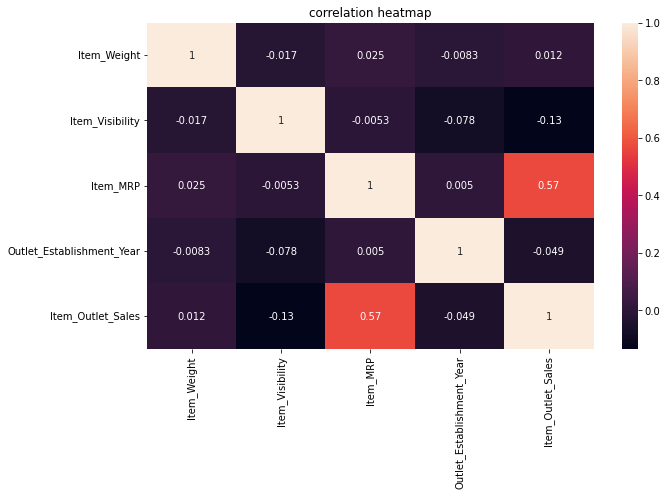

In [28]:
fig, axs = plt.subplots(figsize=(10,6))
axs.set_title('correlation heatmap')
sns.heatmap(train_df.corr(),annot=True)

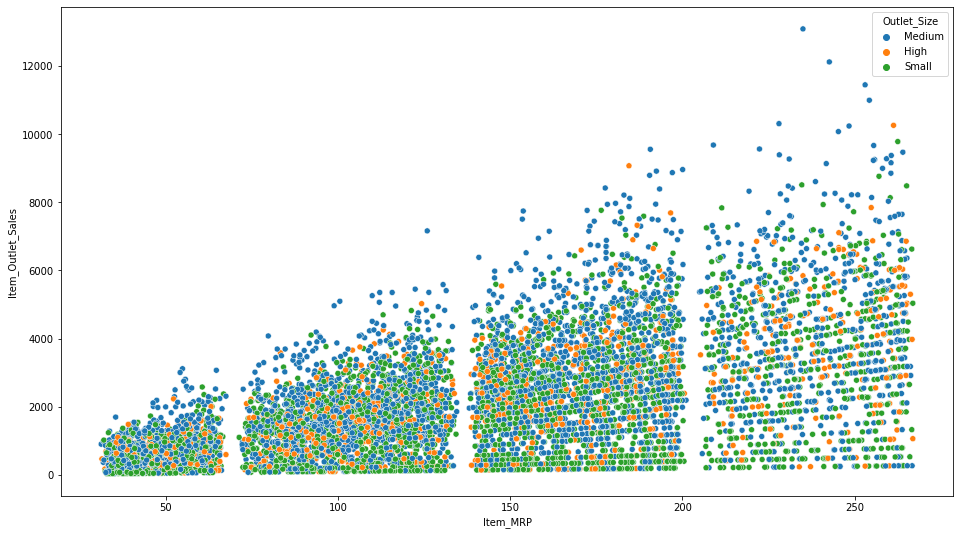

In [32]:
fig, axs = plt.subplots(figsize=(16,9))
sns.scatterplot(data=train_df,x='Item_MRP',y='Item_Outlet_Sales')

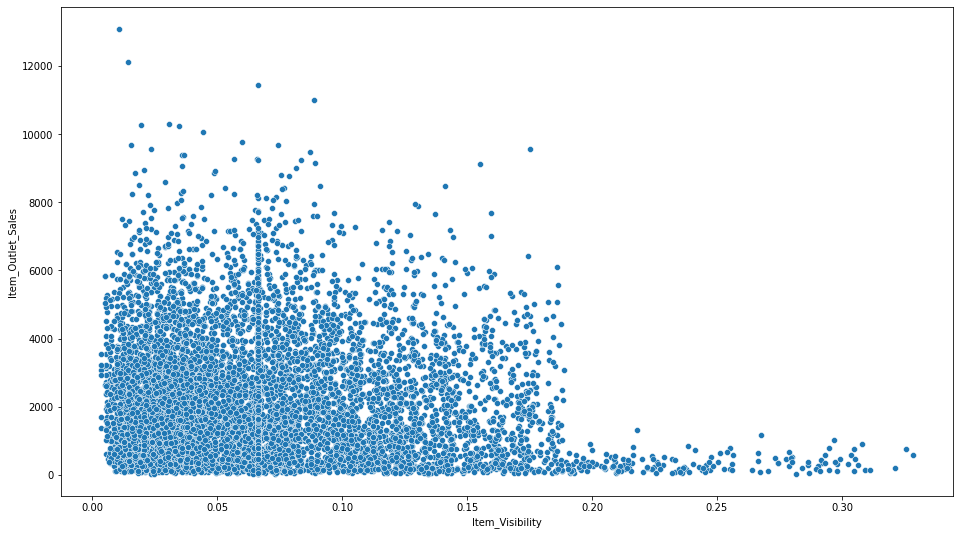

In [34]:
fig, axs = plt.subplots(figsize=(16,9))
sns.scatterplot(data=train_df,x='Item_Visibility',y='Item_Outlet_Sales')